In [2]:
import torch

In [3]:
torch.manual_seed(42)

In [4]:
# Only one data instance
x = torch.tensor(10)
y = torch.tensor(2)

In [5]:
# Simplest possible model?
m = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True)


print(m, c)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [6]:
fx = lambda x : (m*x) + c


In [7]:
def mse(y_pred, y_true):
    return 0.5*(y_pred-y_true)**2

In [8]:
lr = 0.01

In [9]:
ypred = fx(x)
ypred, y

loss = mse(ypred, y)
loss

tensor([1.1186], grad_fn=<MulBackward0>)

In [10]:
loss.backward()

In [11]:
m, m.grad

(tensor([0.3367], requires_grad=True), tensor([14.9571]))

In [12]:
y_pred = fx(x)
loss = mse(y_pred, y)

y_pred, y, loss

(tensor([3.4957], grad_fn=<AddBackward0>),
 tensor(2),
 tensor([1.1186], grad_fn=<MulBackward0>))

In [13]:
loss.backward()

In [14]:
m.grad, c.grad

(tensor([29.9143]), tensor([2.9914]))

# Running the entire thing

Hint: press enter to continue. Input 'q' to stop.
Play around with lr to see different things ;)

In [15]:
values_of_loss = []
values_of_m = []
values_of_c = []
values_of_ypred = []

for i in range(2000):
    # Calcualte model predictions
    y_pred = fx(x)
    
    
    # Compare the prediction with our goal
    loss = mse(y_pred, y)
    print(f"Loss: {loss}\nTrue: {y}\nPred: {y_pred.item()}")
    
    # Reset the gradients before computing new ones
    if m.grad:
        m.grad.zero_()
        c.grad.zero_()
        
    # Compute new gradients: BACKPROPAGATE
    loss.backward()
    
    print(f"Parameters before update:\n\tm: {m.item()}\tgrad: {m.grad.item()}\n\tc: {c.item()}\tgrad: {c.grad.item()}")
    with torch.no_grad():
        m.copy_(m - (lr*m.grad))
        c.copy_(m - (lr*m.grad))
        
        
    print(f"Parametrs after update:\n\tm: {m.item()}\tgrad: {m.grad.item()  if c.grad else None}\n\tc: {c.item()}\tgrad: {c.grad.item() if c.grad else None}")

    # Bookkeeping 
    values_of_ypred.append(y_pred.item())
    values_of_m.append(m.item())
    values_of_c.append(c.item())
    values_of_loss.append(loss.item())

    print('------', i, '------')
    cmd = input().strip()
    if cmd in ['q', 'exit', 'break']:
        break
    
    if loss.item() == 0:
        print('Model fully converged. Stopping.')
        break

Loss: tensor([1.1186], grad_fn=<MulBackward0>)
True: 2
Pred: 3.495713233947754
Parameters before update:
	m: 0.33669036626815796	grad: 14.957132339477539
	c: 0.12880940735340118	grad: 1.495713233947754
Parametrs after update:
	m: 0.18711905181407928	grad: 14.957132339477539
	c: 0.03754773736000061	grad: 1.495713233947754
------ 0 ------

Loss: tensor([0.0042], grad_fn=<MulBackward0>)
True: 2
Pred: 1.9087382555007935
Parameters before update:
	m: 0.18711905181407928	grad: -0.9126174449920654
	c: 0.03754773736000061	grad: -0.09126174449920654
Parametrs after update:
	m: 0.1962452232837677	grad: -0.9126174449920654
	c: 0.20537139475345612	grad: -0.09126174449920654
------ 1 ------

Loss: tensor([0.0141], grad_fn=<MulBackward0>)
True: 2
Pred: 2.167823553085327
Parameters before update:
	m: 0.1962452232837677	grad: 1.6782355308532715
	c: 0.20537139475345612	grad: 0.16782355308532715
Parametrs after update:
	m: 0.17946286499500275	grad: 1.6782355308532715
	c: 0.1626805067062378	grad: 0.16782

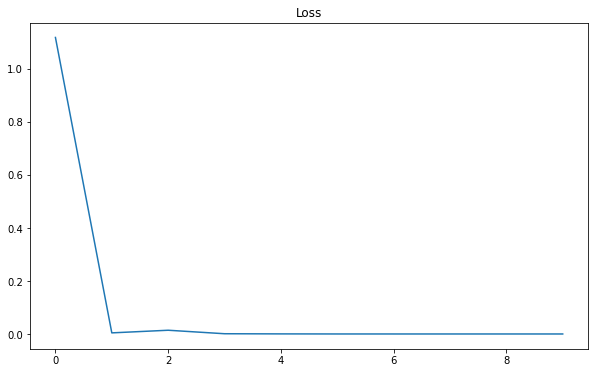

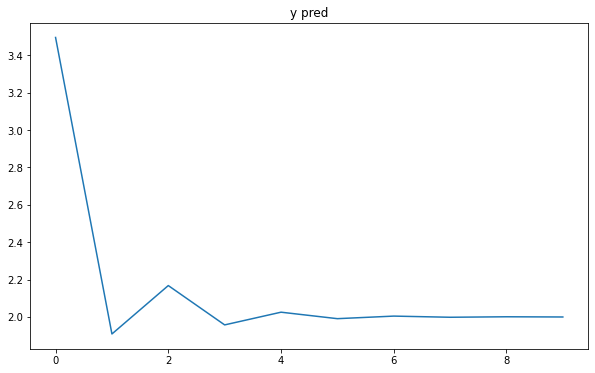

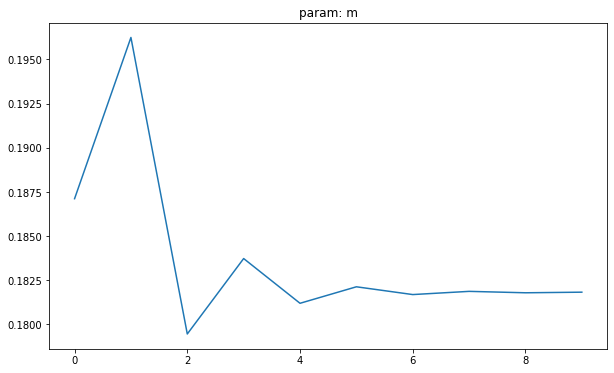

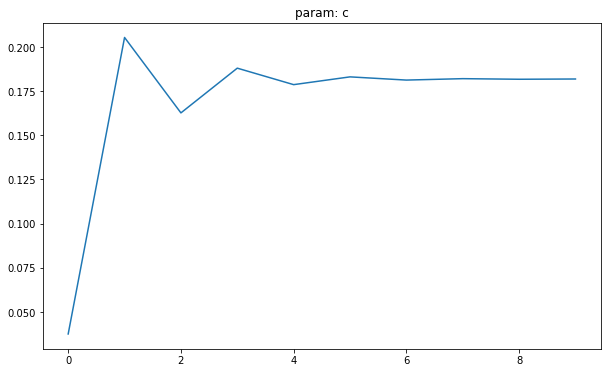

In [19]:


from matplotlib import pyplot as plt
def plot_trace(list_of_vals, title: str=None):
    plt.figure(figsize=(10, 6))
    fig = plt.plot(list_of_vals)
    plt.title(title)
    
plot_trace(values_of_loss, "Loss")
plot_trace(values_of_ypred, "y pred")
plot_trace(values_of_m, "param: m")
plot_trace(values_of_c, "param: c")